In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## Data

In [2]:
train_df = pd.read_csv("titanic_train.csv")
test_df = pd.read_csv("titanic_test.csv")

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_df.sample(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
442,443,0,3,"Petterson, Mr. Johan Emil",male,25.0,1,0,347076,7.7750,NaN,S
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,C78,Q
697,698,1,3,"Mullens, Miss. Katherine ""Katie""",female,NaN,0,0,35852,7.7333,NaN,Q
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C


In [5]:
train_df.shape

(891, 12)

In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## EDA

In [7]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

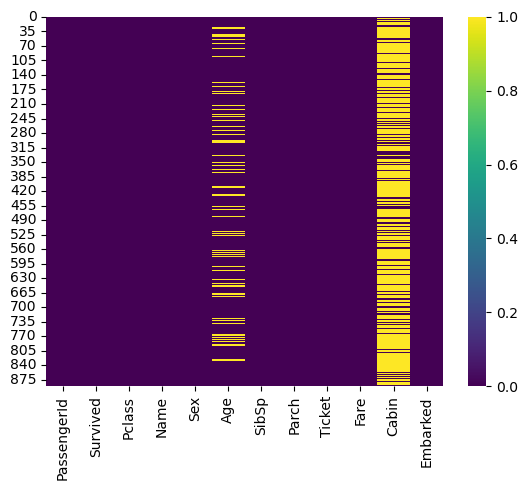

In [8]:
## this shows the null value in dataset through heatmap. in our case Age and Cabin column has null value
sns.heatmap(train_df.isnull(),cmap="viridis")

<Axes: xlabel='Survived', ylabel='count'>

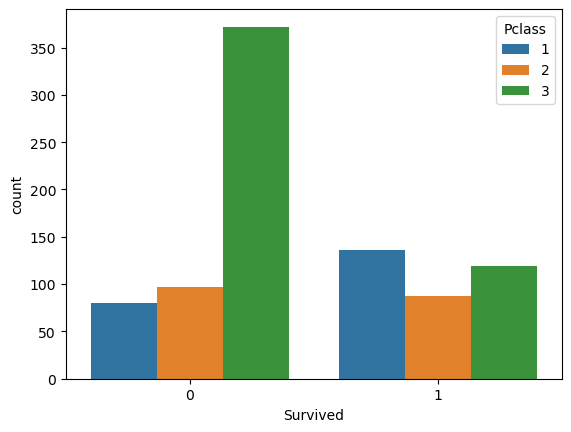

In [9]:
sns.countplot(x="Survived",data = train_df,hue='Pclass')

<Axes: xlabel='Survived', ylabel='count'>

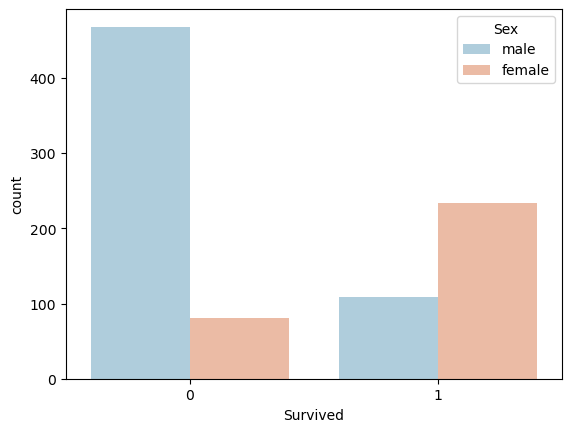

In [10]:
sns.countplot(x="Survived",data = train_df,palette='RdBu_r',hue='Sex')

G:\ana\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


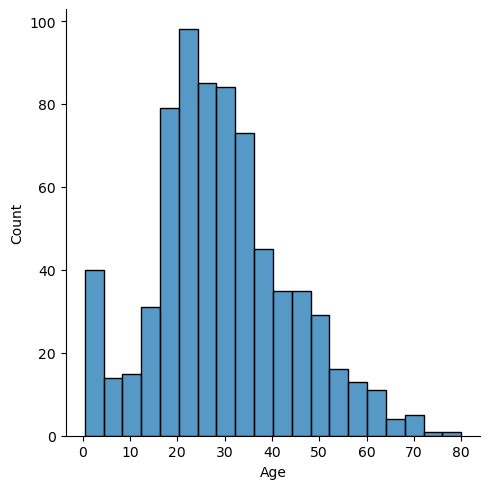

In [11]:
sns.displot(train_df['Age'])

In [12]:
train_df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Pclass', ylabel='Age'>

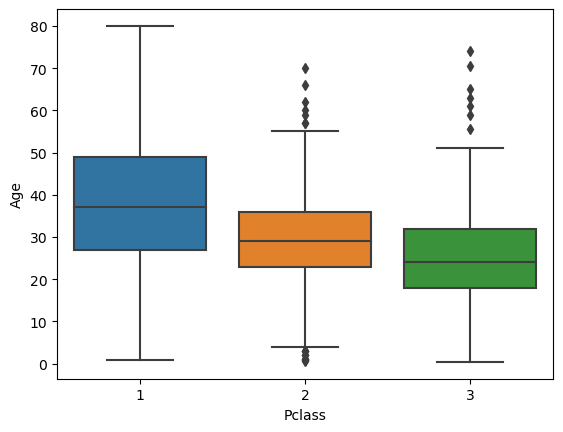

In [13]:
sns.boxplot(x='Pclass',y='Age',data = train_df)

## Data Preprocessing

In [14]:
def impute_Age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        elif Pclass == 3:
            return 24
    else:
        return Age
    

In [15]:
train_df['Age'] = train_df[['Age','Pclass']].apply(impute_Age,axis=1)

In [16]:
train_df.drop(columns=['PassengerId','Name','Cabin','Ticket'],axis=1,inplace=True)

In [17]:
train_df.dropna(inplace=True)

In [18]:
train_df.sample(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
578,0,3,female,24.0,1,0,14.4583,C
627,1,1,female,21.0,0,0,77.9583,S
153,0,3,male,40.5,0,2,14.5000,S


### 1.Handling Categorical Data

In [19]:
sex = pd.get_dummies(train_df['Sex'])
Embarked = pd.get_dummies(train_df['Embarked'])

In [22]:
merged_df = pd.concat([train_df, sex,Embarked], axis=1)


In [26]:
merged_df.drop(['Sex','Embarked'],axis=1,inplace=True)

## Cost function for Categorical Data
- Log Loss function
- Precision 
- F1 Score



In [28]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   female    889 non-null    bool   
 7   male      889 non-null    bool   
 8   C         889 non-null    bool   
 9   Q         889 non-null    bool   
 10  S         889 non-null    bool   
dtypes: bool(5), float64(2), int64(4)
memory usage: 85.2 KB


In [31]:
X = merged_df.drop(['Survived'],axis=1)
Y = merged_df['Survived']

In [40]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=101)

In [66]:
model.predict([[1,20,1,1,120,False,True,False,False,True]])

G:\ana\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [43]:
x_train

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
307,1,17.0,1,0,108.9000,True,False,True,False,False
229,3,24.0,3,1,25.4667,True,False,False,False,True
82,3,24.0,0,0,7.7875,True,False,False,True,False
353,3,25.0,1,0,17.8000,False,True,False,False,True
707,1,42.0,0,0,26.2875,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
576,2,34.0,0,0,13.0000,True,False,False,False,True
840,3,20.0,0,0,7.9250,False,True,False,False,True
338,3,45.0,0,0,8.0500,False,True,False,False,True
524,3,24.0,0,0,7.2292,False,True,True,False,False


## Creating Logistic Regression Model

In [44]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [45]:
model.fit(x_train,y_train)

G:\ana\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
predictions = model.predict(x_test)

In [53]:
model.coef_

array([[-1.00821308e+00, -3.06406457e-02, -2.88759388e-01,
        -1.19373324e-01,  1.66491786e-03,  2.09041292e+00,
        -5.12038350e-01,  6.19240153e-01,  7.00931482e-01,
         2.58202935e-01]])

## Evaluation

In [47]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [49]:
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

In [50]:
accuracy

0.8146067415730337

In [51]:
conf_matrix

array([[98,  9],
       [24, 47]], dtype=int64)

In [68]:
from sklearn.metrics import log_loss, precision_score, f1_score

# Log Loss
logloss = log_loss(y_test, predictions)

# Precision
precision = precision_score(y_test, predictions)

# F1 Score
f1 = f1_score(y_test, predictions)

print(f'Log Loss: {logloss}')
print(f'Precision: {precision}')
print(f'F1 Score: {f1}')


Log Loss: 6.682250347420595
Precision: 0.8392857142857143
F1 Score: 0.7401574803149606


In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       107
           1       0.84      0.66      0.74        71

    accuracy                           0.81       178
   macro avg       0.82      0.79      0.80       178
weighted avg       0.82      0.81      0.81       178

